In [5]:
#Importing required Python packages 
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 

from pprint import pprint 
import seaborn as sns 
from matplotlib import collections 
%matplotlib inline 

ModuleNotFoundError: No module named 'seaborn'

In [6]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x=x[:, np.newaxis]
y = y[:, np.newaxis]

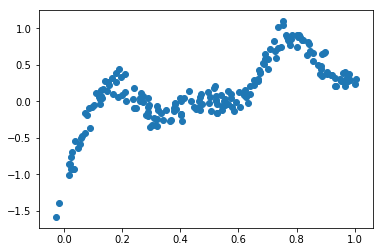

In [7]:
plt.scatter(x, y)

[[1.08875673]] [-0.41213506]


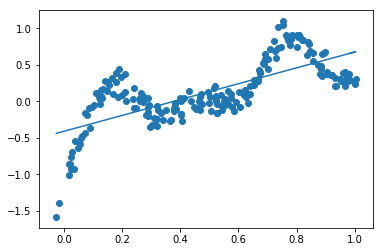

In [8]:
#Instantiate, fit and predict y~x
lin=LinearRegression()
lin.fit(x,y)
y_pred=lin.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred)
print(lin.coef_, lin.intercept_)

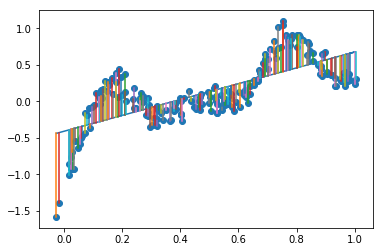

In [9]:
plt.scatter(x, y)
plt.plot(x, y_pred)
for xx, yy, yyPred in zip(x, y, y_pred):
    plt.plot([xx,xx], [yy, yyPred])
plt.show()

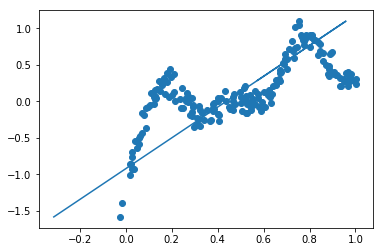

In [10]:
#Instantiate, fit and predict y~x
lin=LinearRegression()
lin.fit(y,x)
x_pred=lin.predict(y)
plt.scatter(x, y)
plt.plot(x_pred, y)

In [11]:
# testing
print(lin.coef_)
print(lin.intercept_)

[[0.47344057]]
[0.43757473]


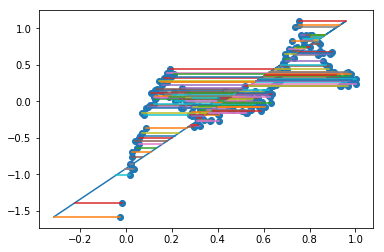

In [12]:
plt.scatter(x, y)
plt.plot(x_pred, y)
for xx, yy, xxPred in zip(x, y, x_pred):
    plt.plot([xx,xxPred], [yy, yy])
plt.show()

[[-0.49370465 -0.86962964]]


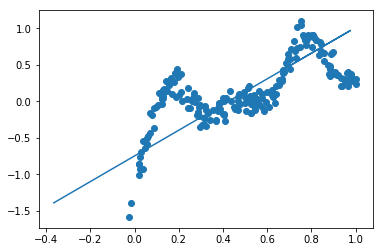

In [13]:
xy = np.array([x,y]).T[0]
# print(xy)
#Instantiate a PCA model, the run fit_transform to xy followed by inverse_transform
pca=PCA(n_components=1)
xy_pca=pca.fit_transform(xy)
xy_n=pca.inverse_transform(xy_pca)

plt.scatter(x, y)
plt.plot(xy_n[:, 0], xy_n[:,1])
print(pca.components_)
# plt.plot(np.linspace(-0.2, 1, 100), np.linspace(-0.2, 1, 100)*pca.components_[0][1]+pca.components_[0][0])

In [14]:
# test purpose
pca.components_

array([[-0.49370465, -0.86962964]])

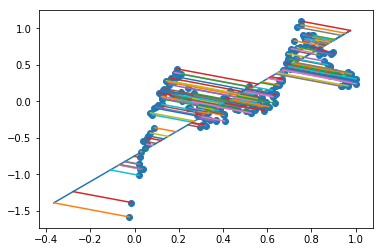

In [15]:
plt.scatter(x, y)
plt.plot(xy_n[:, 0], xy_n[:,1])
for xx, yy, xxPred, yyPred in zip(x, y, xy_n[:, 0], xy_n[:,1]):
    plt.plot([xx,xxPred], [yy, yyPred])
plt.show()

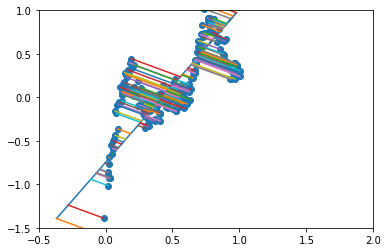

In [16]:
plt.xlim(-0.5,2)
plt.ylim(-1.5,1)
plt.scatter(x, y)
plt.plot(xy_n[:, 0], xy_n[:,1])
for xx, yy, xxPred, yyPred in zip(x, y, xy_n[:, 0], xy_n[:,1]):
    plt.plot([xx,xxPred], [yy, yyPred])
plt.show()

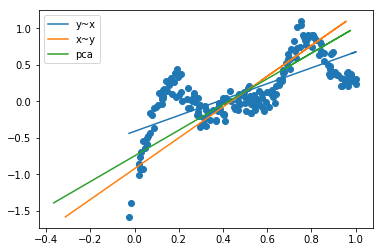

In [17]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.plot(x_pred, y)
plt.plot(xy_n[:, 0], xy_n[:,1])
plt.legend(['y~x', 'x~y', 'pca'])